In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# load data
ad = pd.read_csv('../data/Advertising.csv')
ad.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [2]:
X = ad.iloc[:, 1:4]
y = ad.iloc[:, 4:5]

In [3]:
y.describe()

,sales
count,200.000000
mean,14.022500
std,5.217457
min,1.600000
25%,10.375000
50%,12.900000
75%,17.400000
max,27.000000


In [4]:
# bins = []
# for i in range(0, 31, 10):
#     bins.append(i)

# y = pd.cut(y.values.reshape(-1, ), bins, labels=['low', 'medium', 'high'])
# y = pd.DataFrame(y)

# print(y.head(5))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10 )

# 9 different regressor algorithms

+ **Decision tree -** sklearn.tree.DecisionTreeRegressor
+ **Random forest -** sklearn.ensemble.RandomForestRegressor
+ **XGBoost -** xgboost.XGBRegressor
+ **Ridge -** sklearn.linear_model.Ridge
+ **SGD -** sklearn.linear_model.BayesianRidge
+ **KNN -** sklearn.neighbors.KNeighborsRegressor
+ **Neural network -** sklearn.neural_network.MLPRegressor
+ **Gaussian Process -** sklearn.gaussian_process.GaussianProcessRegressor

In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [10]:
def run_model(model, al_name, plot_index):
    model.fit(X_train, y_train.values.reshape(-1, ))
    y_pred = model.predict(X_test)
    
    accuracy = sqrt(mean_squared_error(y_test, y_pred))
    
#     color_code = {'low': 'red', 'medium': 'green', 'high': 'blue'}
    plot_index -= 1
    ax = axes[plot_index//3, plot_index%3]
    
#     colors_actual = [color_code[i] for i in y_test.iloc[:, 0]]
#     colors_pred = [color_code[i] for i in y_pred]
    
    ax.scatter(X_test.iloc[:, 0], y_test, color='blue', marker='.', label='Dot = Ground_truth')
    ax.scatter(X_test.iloc[:, 0], y_pred, color='red', facecolor='none', marker='o', label='Circle = Prediction')
    
    ax.legend(loc="lower right")
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')
    
    ax.set_title(al_name + " - error = " + str(round(accuracy, 4)))


In [11]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# run_model3(model, 'Decision Tree', 1)

# plt.show()

[17:47:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


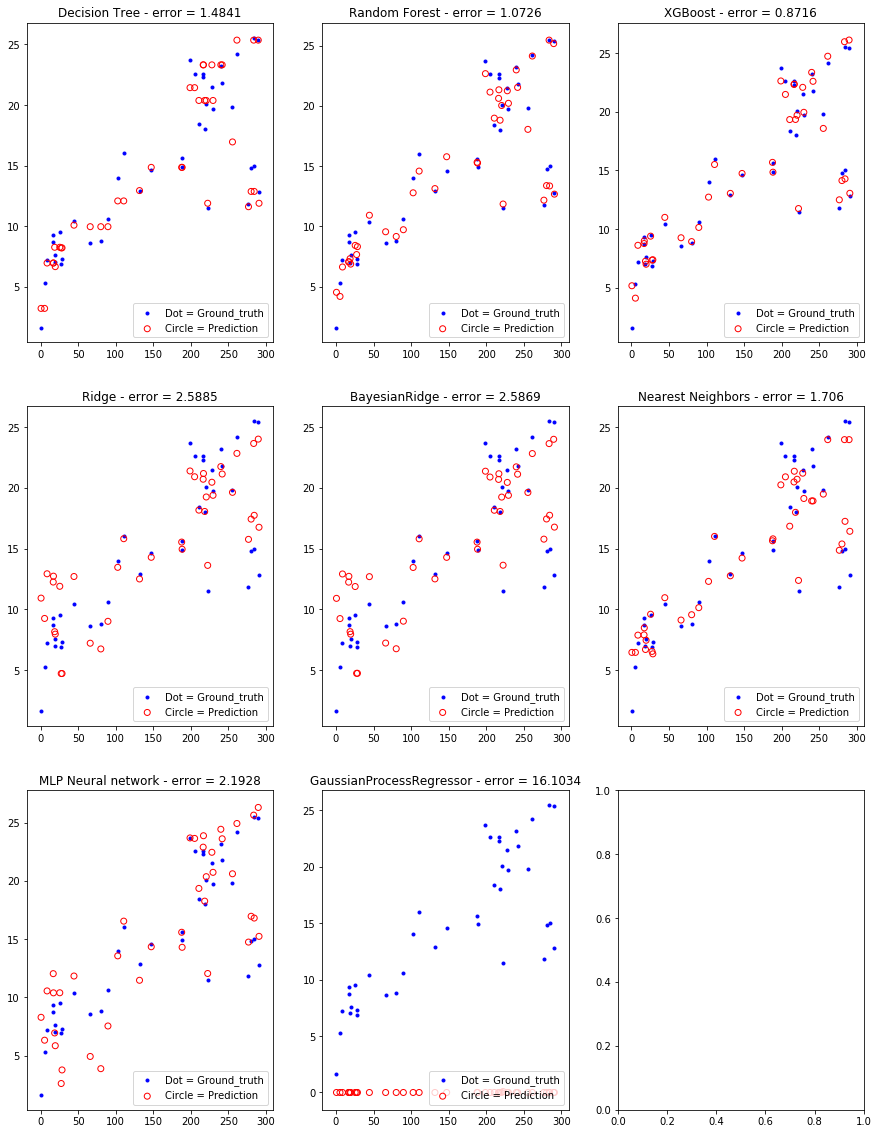

In [12]:
fig = plt.figure(figsize=(15,20))
axes = fig.subplots(nrows=3, ncols=3)

# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeRegressor(criterion='mse', max_depth=5)
run_model(model, "Decision Tree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
run_model(model, "Random Forest", 2)

# # ----- xgboost ------------
# # install xgboost
# # 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079
from xgboost import XGBRegressor

model = XGBRegressor()
run_model(model, "XGBoost", 3)

# # ----- Ridge ------------
from sklearn.linear_model import Ridge

model = Ridge()
run_model(model, "Ridge", 4)

# # ------ BayesianRidge ----------------
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
run_model(model, "BayesianRidge", 5)

# # -------- Nearest Neighbors ----------
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
run_model(model, "Nearest Neighbors", 6)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
run_model(model, "MLP Neural network", 7)

# ----------- GaussianProcessRegressor  ------------
from sklearn.gaussian_process import GaussianProcessRegressor

model = GaussianProcessRegressor()
run_model(model, "GaussianProcessRegressor", 8)